# Forecasting of temperature across a week
In this project, we will be looking at temperature of an office. Forecasting of temperature will be useful for temperature control efficiency in future. 

## Import libraries and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as ss

In [2]:
df = pd.read_csv("occupancy.txt")
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

In [ ]:
df.set_index('date',inplace=True)

In [6]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


## Resampling data into days, hours and every 30 mins

In [126]:
df_day = df.resample('D').mean()
df_hourly = df.resample('H').mean()
df_thirty_mins = df.resample('30T').mean()

print(df_hourly.head())

                     Temperature   Humidity       Light          CO2  \
date                                                                   
2015-02-11 14:00:00    21.781250  31.270278  437.041667  1020.513889   
2015-02-11 15:00:00    21.878472  31.062125  435.390278   949.143056   
2015-02-11 16:00:00    21.904918  30.264495  429.975410   780.993169   
2015-02-11 17:00:00    21.885144  29.968808  424.299435   735.552260   
2015-02-11 18:00:00    21.637042  28.989528  172.013889   656.591667   

                     HumidityRatio  Occupancy  
date                                           
2015-02-11 14:00:00       0.005050   1.000000  
2015-02-11 15:00:00       0.005046   0.950000  
2015-02-11 16:00:00       0.004924   1.000000  
2015-02-11 17:00:00       0.004869   1.000000  
2015-02-11 18:00:00       0.004638   0.416667  


Every day


Text(0, 0.5, 'CO2')

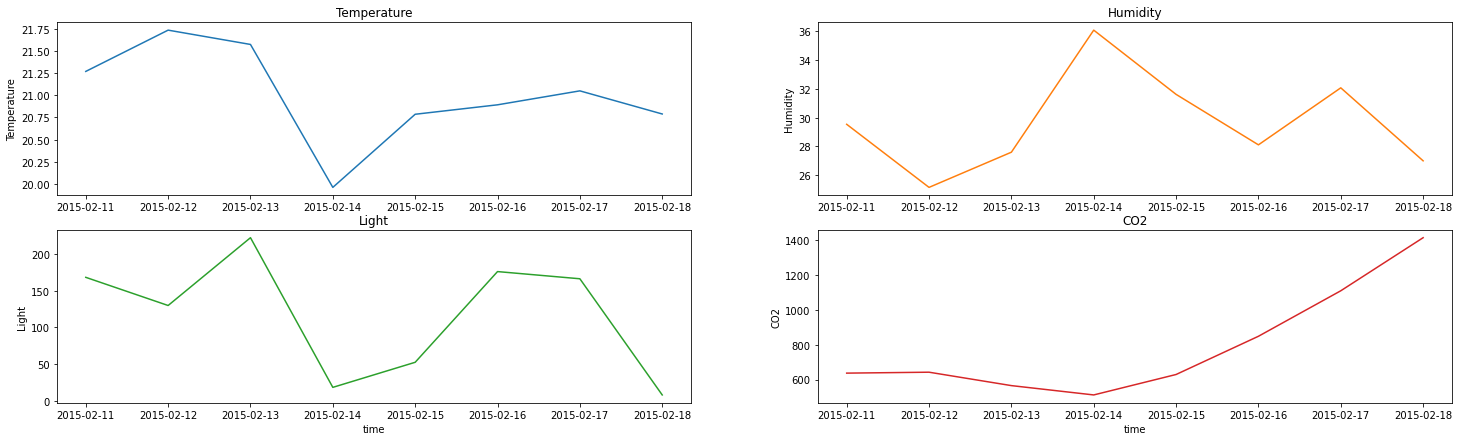

In [127]:
print('Every day')

fig, axs = plt.subplots(2, 2,figsize=[25,7])
axs[0, 0].plot(df_day.index, df_day.Temperature)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_ylabel('Temperature')

axs[0, 1].plot(df_day.index, df_day.Humidity, 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(df_day.index, df_day.Light, 'tab:green')
axs[1, 0].set_title('Light')
axs[1, 0].set_xlabel('time')
axs[1, 0].set_ylabel('Light')

axs[1, 1].plot(df_day.index, df_day.CO2, 'tab:red')
axs[1, 1].set_title('CO2')
axs[1, 1].set_xlabel('time')
axs[1, 1].set_ylabel('CO2')

Every hour


Text(0, 0.5, 'CO2')

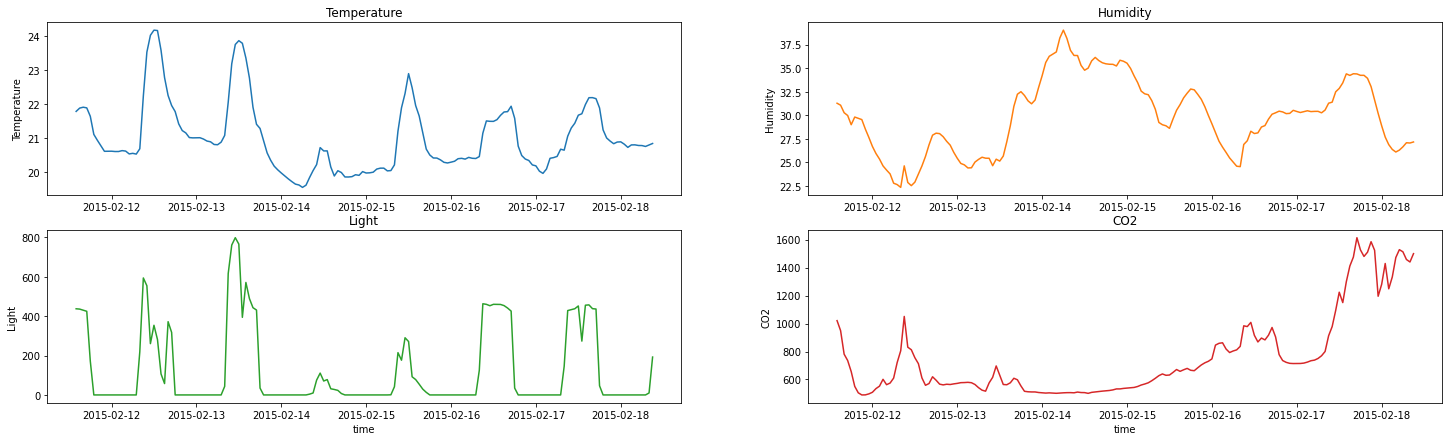

In [124]:
print('Every hour')

fig, axs = plt.subplots(2, 2,figsize=[25,7])
axs[0, 0].plot(df_hourly.index, df_hourly.Temperature)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_ylabel('Temperature')

axs[0, 1].plot(df_hourly.index, df_hourly.Humidity, 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(df_hourly.index, df_hourly.Light, 'tab:green')
axs[1, 0].set_title('Light')
axs[1, 0].set_xlabel('time')
axs[1, 0].set_ylabel('Light')

axs[1, 1].plot(df_hourly.index, df_hourly.CO2, 'tab:red')
axs[1, 1].set_title('CO2')
axs[1, 1].set_xlabel('time')
axs[1, 1].set_ylabel('CO2')

Every thirty minute


Text(0, 0.5, 'CO2')

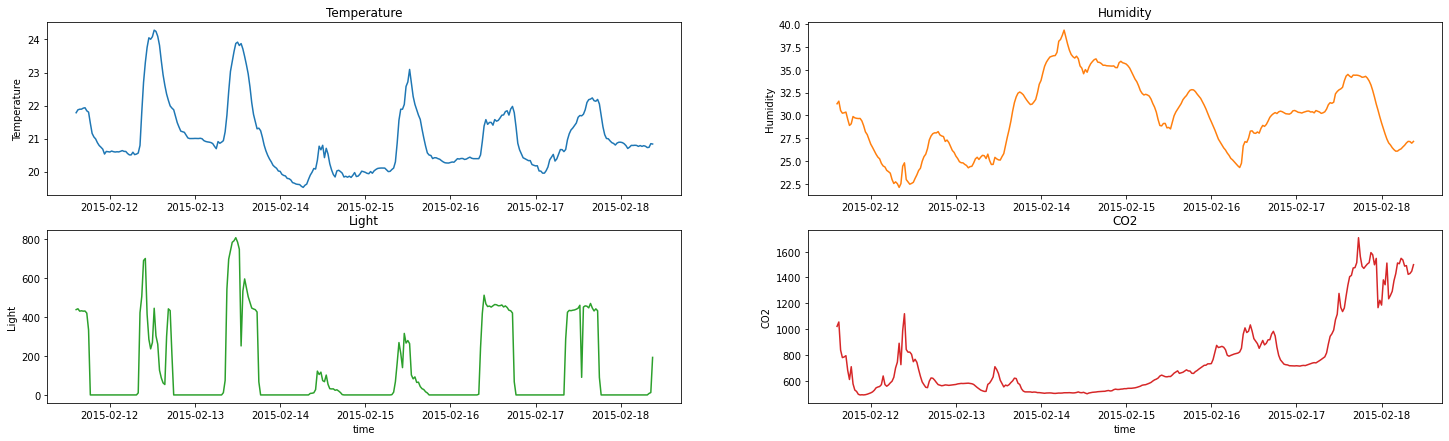

In [125]:
print('Every thirty minute')

fig, axs = plt.subplots(2, 2,figsize=[25,7])
axs[0, 0].plot(df_thirty_mins.index, df_thirty_mins.Temperature)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_ylabel('Temperature')

axs[0, 1].plot(df_thirty_mins.index, df_thirty_mins.Humidity, 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(df_thirty_mins.index, df_thirty_mins.Light, 'tab:green')
axs[1, 0].set_title('Light')
axs[1, 0].set_xlabel('time')
axs[1, 0].set_ylabel('Light')

axs[1, 1].plot(df_thirty_mins.index, df_thirty_mins.CO2, 'tab:red')
axs[1, 1].set_title('CO2')
axs[1, 1].set_xlabel('time')
axs[1, 1].set_ylabel('CO2')

In the interest of learning, we will only be looking at temperature and time to forecast future temperature. 

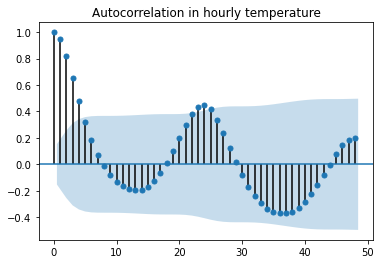

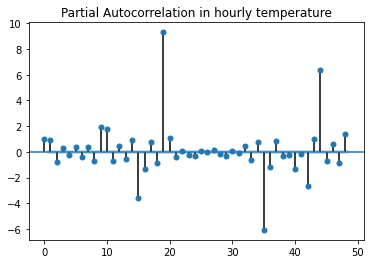

In [138]:
# let's use hourly data as we can see a distinct pattern w/o too much noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# Autocorrelation and Partial Autocorrelation Functions for Daily Data
acf_plot = plot_acf(df_hourly['Temperature'], lags = 48, title='Autocorrelation in hourly temperature')
pacf_plot = plot_pacf(df_hourly['Temperature'], lags=48, title='Partial Autocorrelation in hourly temperature')

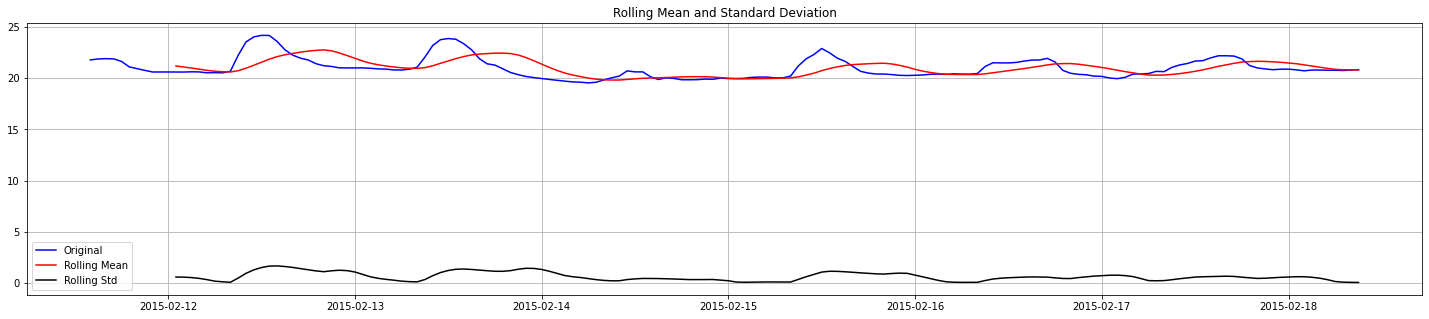

In [402]:
#Determing rolling statistics
rolmean = df_hourly['Temperature'].rolling(window=12).mean()
rolstd = df_hourly['Temperature'].rolling(window=12).std()

#Plot rolling statistics:
plt.figure(figsize=(25,5))
orig = plt.plot(df_hourly['Temperature'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.grid()
plt.show(block=False)

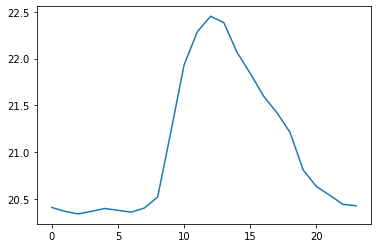

In [403]:
hourly_temp = df_hourly.groupby(df_hourly.index.hour).mean()['Temperature']
plt.plot(np.arange(24),hourly_temp)
# we can see a increase in temperature at 0800H and peaks at 1200H, falling to 2200H before plateuing till the next day

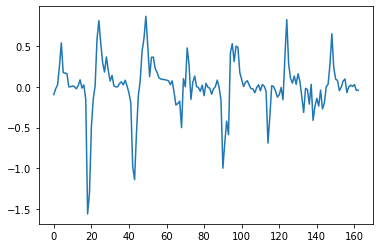

In [202]:
diff = np.array(df_hourly['Temperature'][:-1]) - np.array(df_hourly['Temperature'][1:])
plt.plot(np.arange(len(diff)), diff)

In [209]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(diff)
print(pvalue)
# it is stationary as we reject null hypothesis of non-stationary

3.76404723436193e-09


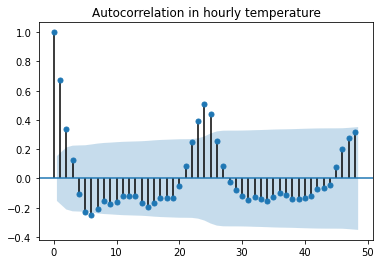

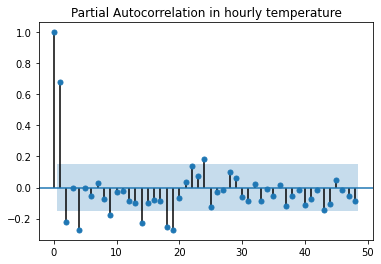

In [211]:
acf_plot = plot_acf(diff, lags=48, title='Autocorrelation in hourly temperature')
pacf_plot = plot_pacf(diff, lags=48, title='Partial Autocorrelation in hourly temperature')
# we can tell there is a ma 3 as only 3 acf are signifcant or 2 ar as there are 2 pacf that are VERY significant
# we can also try out ARIMA models of varying p & q

In [223]:
df_hourly_arr = np.array(df_hourly['Temperature'])

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=df_hourly_arr, model='additive', period=48)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

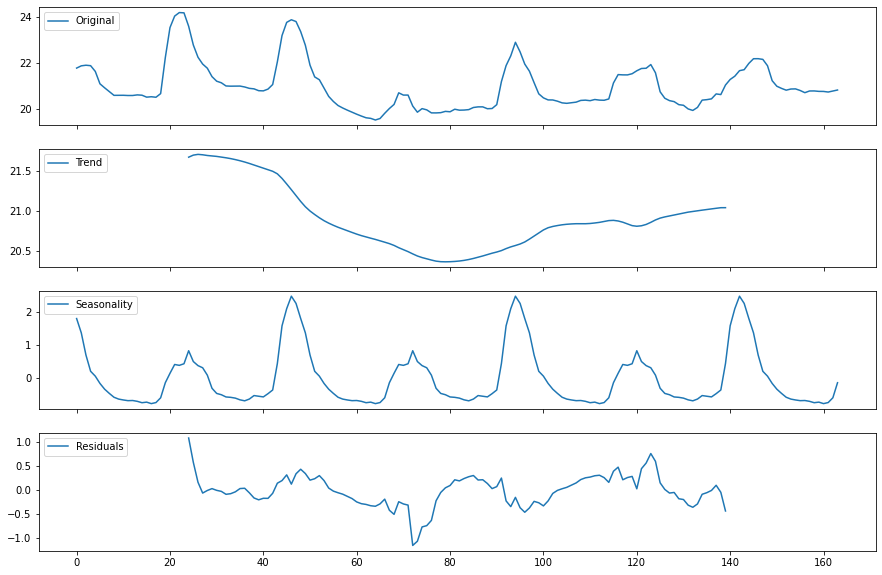

In [228]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_hourly_arr, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

# Smoothing techniques
* Simple smoothing
* Moving average
* Exponential smoothing

## Simple smoothing

In [237]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [232]:
time = np.arange(len(df_hourly_arr))

In [235]:
hourly_mean = np.mean(df_hourly_arr)

# create array composed of mean value and equal to length of time array
sts_avg = np.full(shape=len(time), fill_value=hourly_mean, dtype='float')

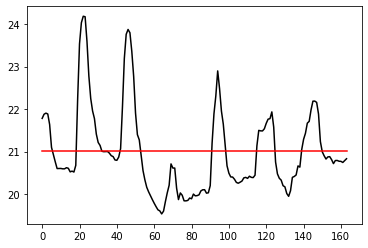

In [236]:
plt.plot(time, df_hourly_arr, 'k-')
plt.plot(time, sts_avg, 'r', label="mean")

In [239]:
mse(sts_avg,df_hourly_arr)

167.63446506728377

## Moving Average Smoothing

In [290]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window] # to sum up the 3 values in the window
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(4))
    else:
        return cumulative_sum[window - 1:] / window

In [291]:
smoothed_trend = moving_average(df_hourly_arr, window=5, forecast=True)

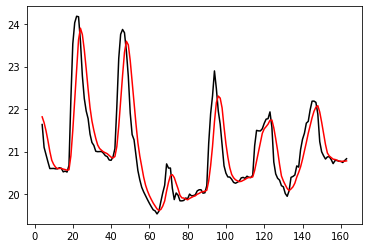

In [335]:
plt.plot(time[4:], df_hourly_arr[4:], 'k-')
plt.plot(time[4:], smoothed_trend[4:], 'r', label="moving_avg")
# [4:] because first few values are starting at 0, thus skewing the mse

In [336]:
mse(smoothed_trend[4:],df_hourly_arr[4:])

46.25780334859628

## Exponential Smoothing

In [298]:
def ewma(observations, forecast=False):
    '''returns the exponentially weighted smoothed version of an array of observations.'''
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, 0)
    else:
        return output

In [301]:
ewma_smoothed_vals = ewma(df_hourly_arr, forecast=False)

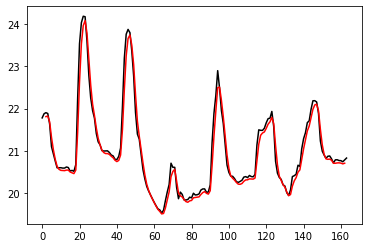

In [343]:
plt.plot(time, df_hourly_arr, 'k-')
plt.plot(time[2:-1], ewma_smoothed_vals[2:-1], 'r', label="moving_avg")
# [2:-1] because first & last few values are starting at 0, thus skewing the mse

In [344]:
mse(df_hourly_arr[2:-1],ewma_smoothed_vals[2:-1])

6.428526848150107

moving avg mse: 46.25780334859628
exp avg mse: 6.428526848150107


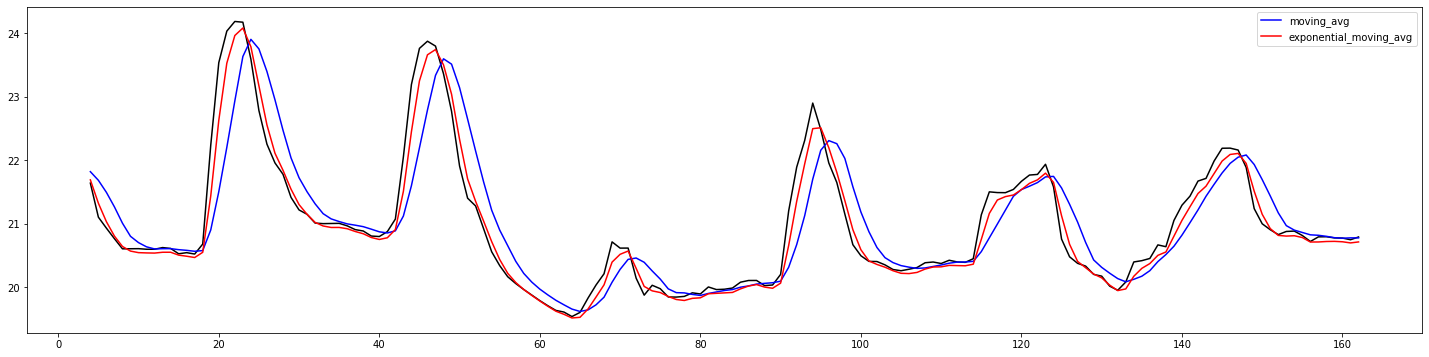

In [357]:
plt.figure(figsize=(25, 6))
plt.plot(time[4:-1], df_hourly_arr[4:-1], 'k-')
plt.plot(time[4:-1], smoothed_trend[4:-1], 'b', label="moving_avg")
plt.plot(time[4:-1], ewma_smoothed_vals[4:-1], 'r', label="exponential_moving_avg")
plt.legend()

print('moving avg mse:', mse(smoothed_trend[4:],df_hourly_arr[4:]))
print('exp avg mse:', mse(df_hourly_arr[2:-1],ewma_smoothed_vals[2:-1]))

# Predictions methods
* Exponential smoothing
* ARMA
* SARIMAX
* Auto ARMA
* Auto SARIMAX

## Exponential smoothing

In [323]:
test_size = 50
train = df_hourly_arr[:-test_size]
test = df_hourly_arr[-test_size:]
print('Train shape:',train.shape,'\n')
print('Test shape:',test.shape)

Train shape: (114,) 

Test shape: (50,)


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
preds = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=24).fit(optimized=True)

preds = ExponentialSmoothing.forecast(len(test))

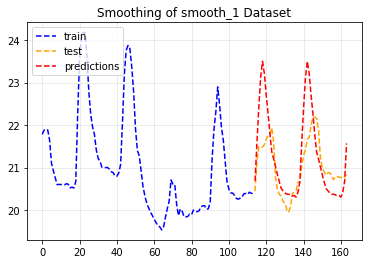

In [386]:
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()

In [665]:
mse(preds,test)

27.373920383785762

## ARMA

In [550]:
import statsmodels.api as sm

# using ARMA model from statsmodel package
model = sm.tsa.ARMA(train, (2, 2)).fit(trend='nc', disp=0)
model.params

C:\Users\Shaun\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


array([ 1.54738077, -0.54764521,  0.35848936, -0.05354773])

In [551]:
pred_ARMA = model.forecast(steps = 50)[0]

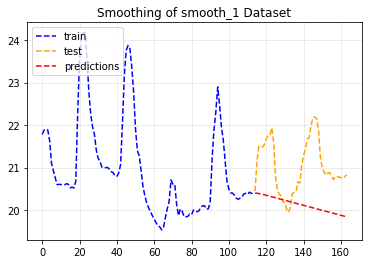

mse: 59.66464245074624


In [674]:
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], pred_ARMA, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()
print('mse:', mse(pred_ARMA,test))

In [666]:
mse(pred_ARMA,test)

59.66464245074624

## SARIMAX

In [538]:
sar = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -5.624
Date:                            Sun, 03 Jan 2021   AIC                             23.248
Time:                                    00:52:07   BIC                             38.938
Sample:                                         0   HQIC                            29.600
                                            - 114                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.014     -0.015      0.988      -0.028       0.028
ar.L1          0.2771      0.179      1.549      0.121      -0.073       0.628
ma.L1          0.4632      0.167      2.771      0.006       0.136       0.791
ar.S.L12      -0.3577      0.090     -3.986      0.000      -0.534      -0.182
ma.S.L12      -0.9483      0.567     -1.673      0.094      -2.059       0.162
sigma2         0.0482      0.026      1.874      0.061      -0.002       0.099
===================================================================================
Ljung-Box (Q):                       48.14   Jarque-Bera (JB):                46.35
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.22
Prob(H) (two-sided):                  0.99   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

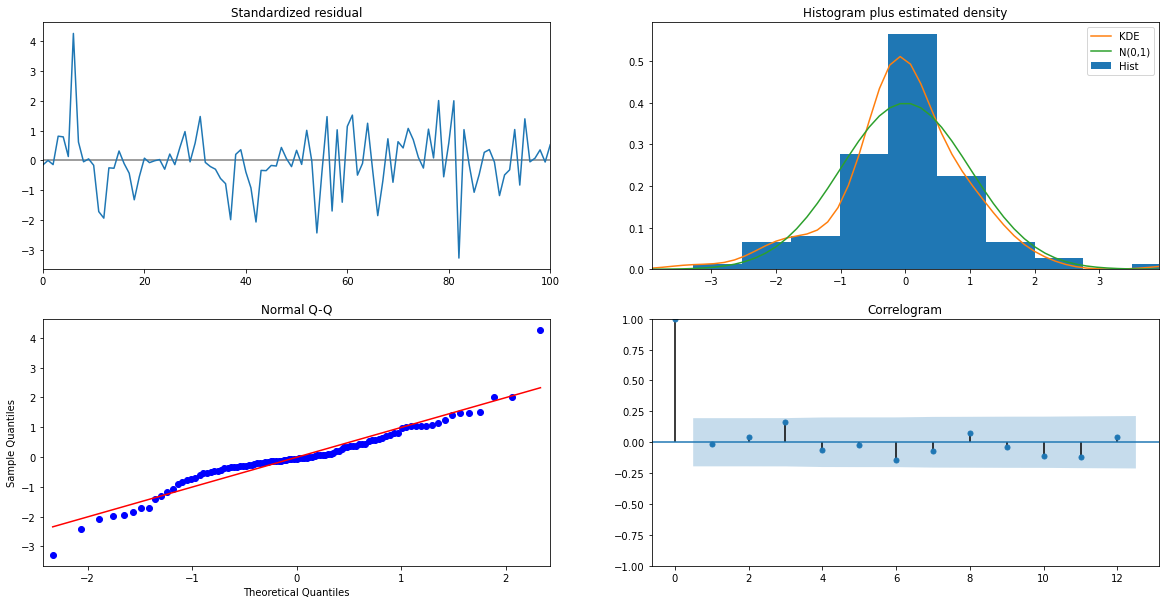

In [539]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

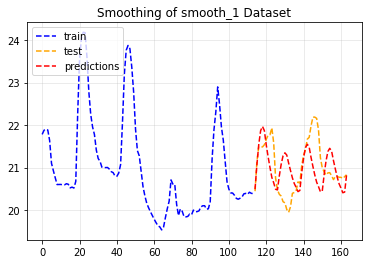

mse: 21.303908884188974


In [673]:
pred_sar = sar.forecast(50)

plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], pred_sar, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()
print('mse:', mse(pred_sar,test))

## Auto ARIMA

In [555]:
import pmdarima as pm

stepwise_model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=410.704, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=58.334, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=409.017, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=178.231, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=60.006, Time=0.98 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=57.952, Time=0.80 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=312.740, Time=0.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=20.367, Time=0.84 sec

In [558]:
pred_auto_ARIMA = stepwise_model.predict(50)

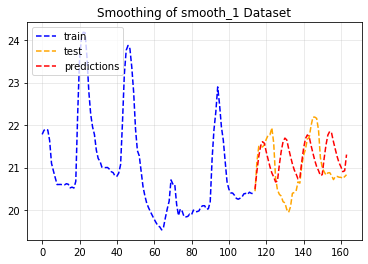

mse: 25.671206246250556


In [672]:
pred_sar = sar.forecast(50)

plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], pred_auto_ARIMA, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()
print('mse:', mse(pred_auto_ARIMA,test))

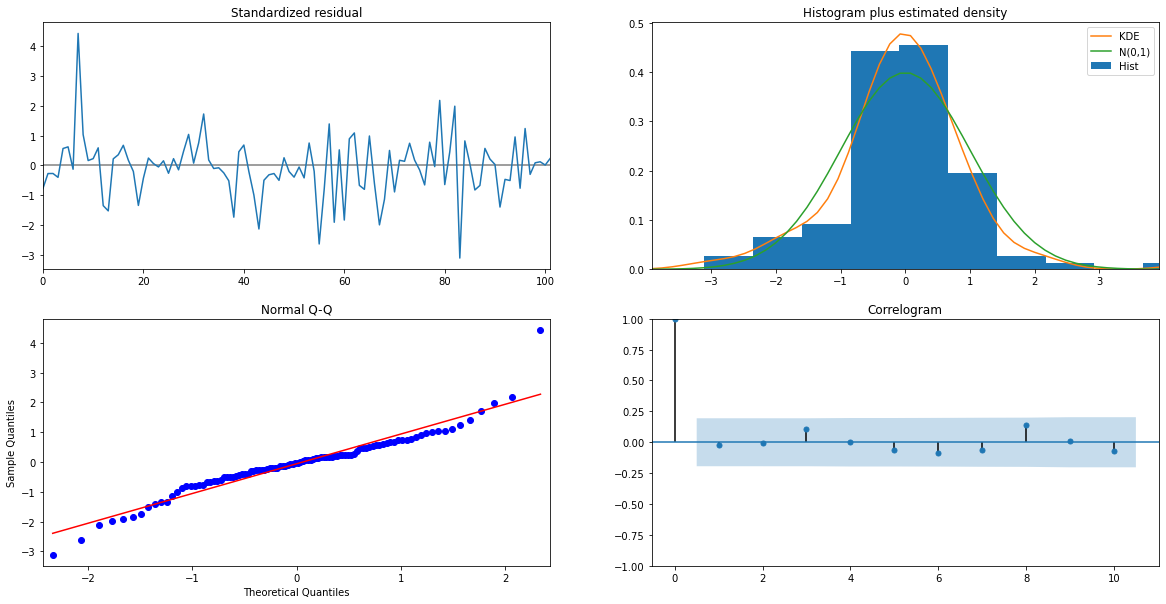

In [561]:
stepwise_model.plot_diagnostics(figsize = (20,10),);

## Auto SARIMAX

In [668]:
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [669]:
# warnings.filterwarnings("ignore")
series = train
horizon = 0
start = len(train)
step_size = 3
order = (2,2,2)
seasonal_order = (0,1,1,12)

cv1 = cross_validate(series,horizon,start,step_size,
                    order = order,
                    seasonal_order = seasonal_order)

In [670]:
model = sm.tsa.statespace.SARIMAX(series, 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=None).fit()

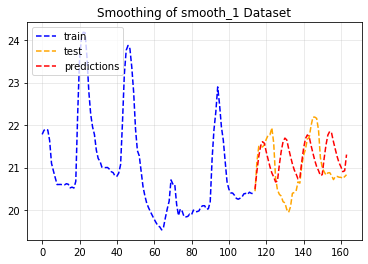

mse: 25.671206246250556


In [675]:
pred_auto_sar = model.forecast(50)

plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], pred_auto_sar, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()
print('mse:', mse(pred_auto_sar,test))

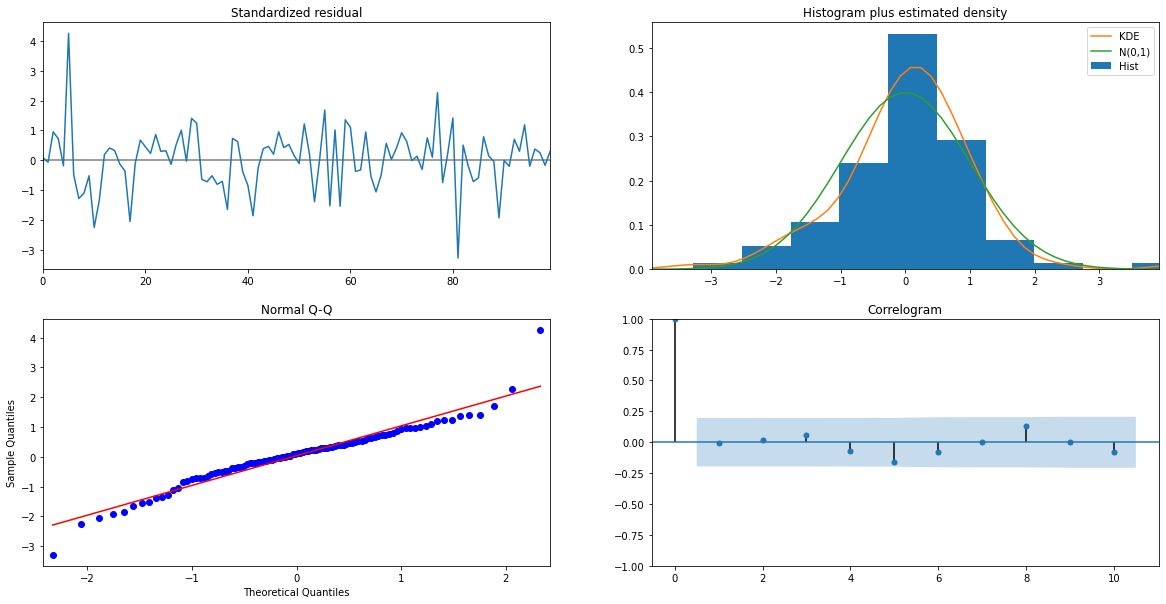

In [676]:
model.plot_diagnostics(figsize = (20,10),);

In this project, we explored 4 different models – namely Exponential smoothing, ARMA, Auto ARIMA and Auto SARIMAX.
<p><br /> Despite the simplicity of exponential smoothing as compared to other models, it is best able to capture trends. In the case of an office space temperature, this would be of more value as we would want our air condition to work harder when it is hotter and stop when it is colder!
<p><br />ARMA has been observed to struggle with extrapolation into many periods into the future. Most likely that it is not optimized, but it is a poor model in this project as it too nearsighted.

<p><br />Auto ARIMA and auto SARIMAX seems to capture the same trend with a slight difference and have amazing MSE values. However, it seems to capture the seasonality frequency wrongly and thus not as impactful. If implemented into our air conditioner regulating system, we would expect fluctuating office temperature across a short period of time.